In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [29]:
#Loads the dataset containing mall customer data.
data = pd.read_csv("Mall_Customers.csv")

In [30]:
data.head()
#view

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


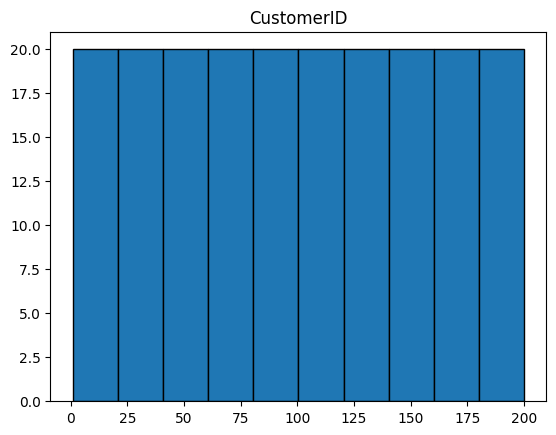

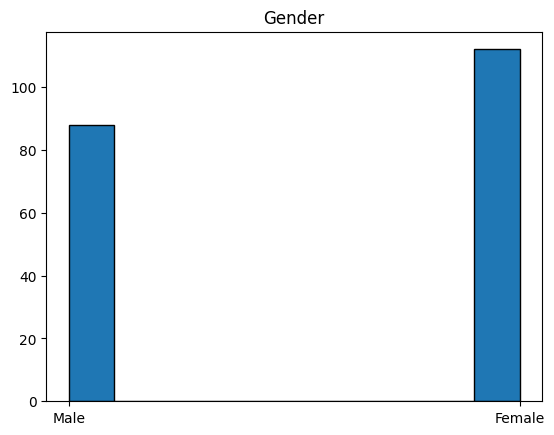

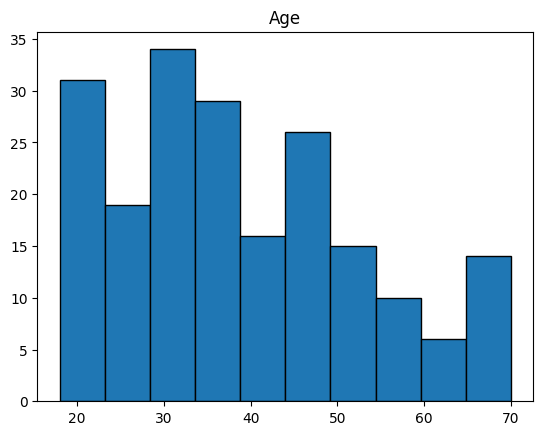

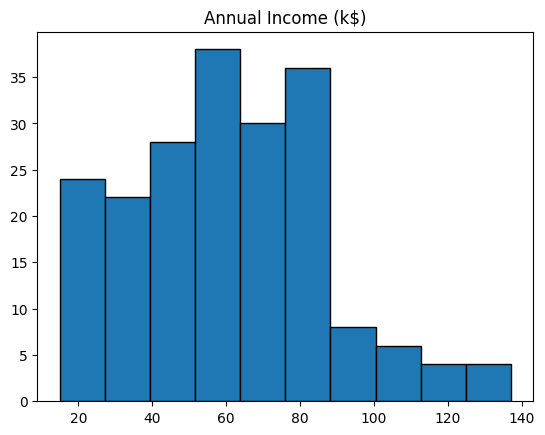

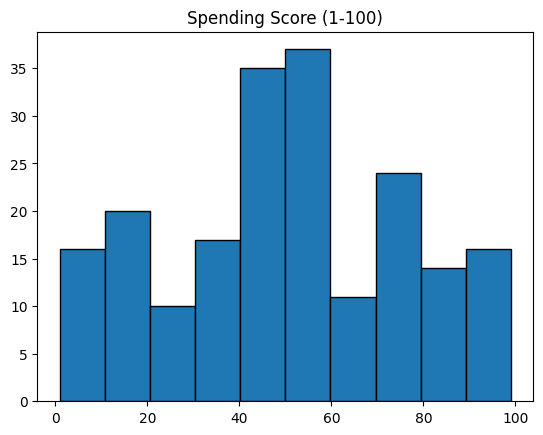

In [33]:
for col in data.columns:
    plt.hist(data[col],edgecolor="black")
    plt.title(col)
    plt.show()

In [34]:
gender = {"Male":1,"Female":0} # mapping values to gender types
data["Gender"] = data["Gender"].map(gender) 

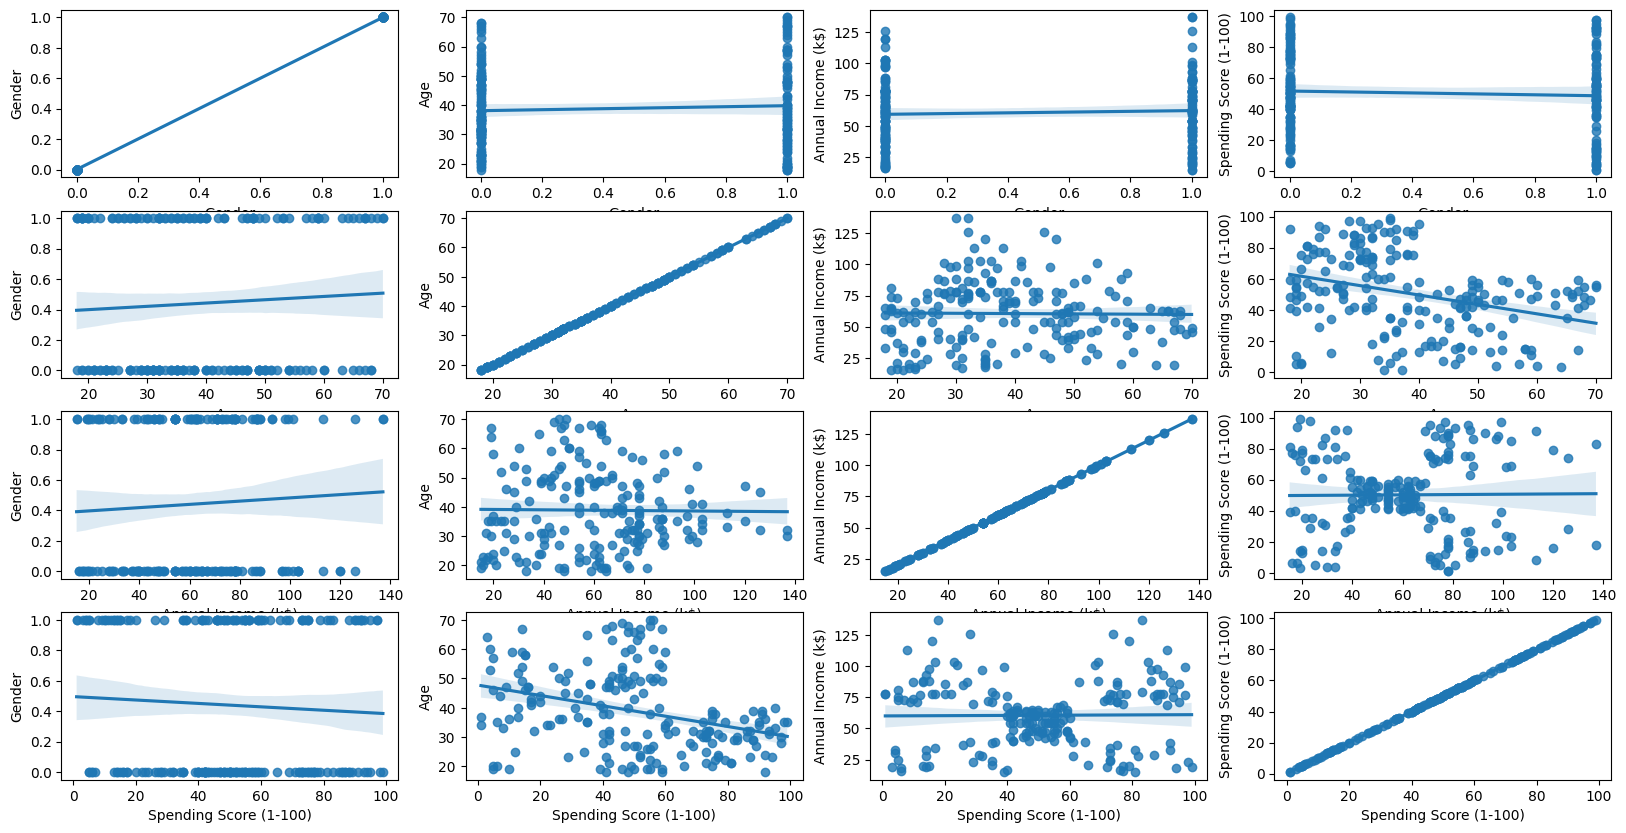

In [35]:
n = 0
columns = data.columns[1:]

plt.figure(1,figsize = (20,10)) # Setting the figure size for the subplots
numCols = len(columns)
for x in columns:
    for y in columns:
        n+=1
        plt.subplot(numCols,numCols,n) # Creating a subplot at position n in a grid of numCols*numCols
        sns.regplot(x=x,y=y,data=data) # Plotting a regression plot for each pair of columns

In [36]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [37]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
x = data[["Annual Income (k$)","Spending Score (1-100)"]]

In [39]:
from sklearn.cluster import KMeans # Importing the KMeans clustering algorithm from scikit-learn

wcss = [] # An empty list to store the Within-Cluster Sum of Squares (WCSS) values
for i in range(1,11):
    # Creating a KMeans algorithm instance with 'i' clusters and using 'k-means++' method for initialization
    algorithm = KMeans(n_clusters = i,init="k-means++") 
    algorithm.fit(x)
    wcss.append(algorithm.inertia_)
    

In [40]:
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30241.343617936585, 25007.383947312057, 21794.8856090982, 19672.07284901432]


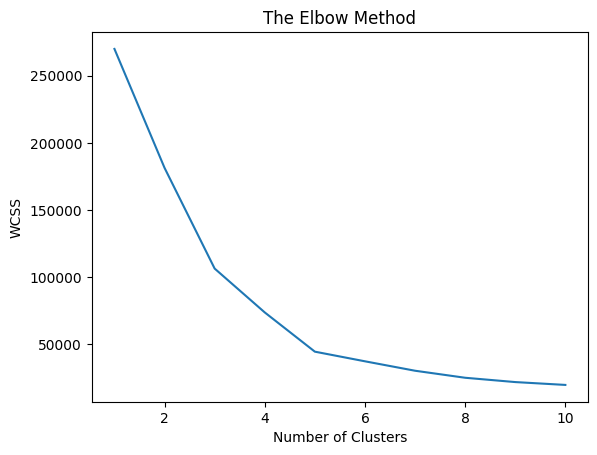

In [41]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show() #displaying the plot 